In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [175]:
from nltk.corpus import stopwords
import nltk
from pymorphy3 import MorphAnalyzer
from langdetect import detect

In [176]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thunderobot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
from sklearn.model_selection import train_test_split

# Подготовка данных

## Выгрузка данных

In [177]:
PATH_TO_FILE: str = 'part1.csv'

df1 = pd.read_csv(PATH_TO_FILE)

PATH_TO_FILE: str = 'part2.csv'

df2 = pd.read_csv(PATH_TO_FILE)

df = pd.concat([df1, df2], ignore_index=True, axis=0)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   oid       65000 non-null  int64 
 1   text      65000 non-null  object
 2   category  38740 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


Text(0, 0.5, 'Количество')

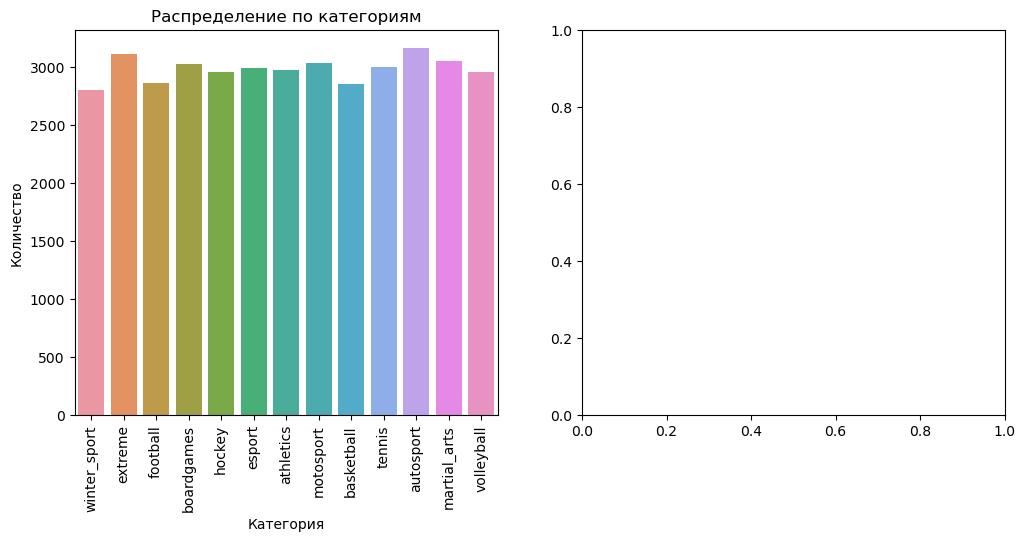

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='category', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_title('Распределение по категориям')
axs[0].set_xlabel('Категория')
axs[0].set_ylabel('Количество')

In [180]:
df.head()

,oid,text,category
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,NaN
1,452466036,Естественное восстановление после тяжелой трен...,NaN
2,161038103,Тема нарядов продолжается Одна из британских ж...,NaN
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...,NaN
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...,NaN


In [181]:
df.tail()

,oid,text,category
64995,910636962,8 битная буря снова накрыла пикселями автомоби...,autosport
64996,669736851,Ира Сидоркова объясняет как сказалась на ее ма...,autosport
64997,558919241,24 я ракетка мира хорват Марин Чилич обыграл и...,tennis
64998,776944963,Стал известен календарь мужской сборной России...,volleyball
64999,577334983,Первенство ВХЛ. Первый этап Динамо Алтай Бн ЦС...,hockey


## Предобработка

In [182]:
morph = MorphAnalyzer()
stopwords_ru = set(stopwords.words('russian'))
stopwords_en = set(stopwords.words('english'))

In [183]:
def preprocess(text):
    try:
        lang = detect(text) 
    except:
        lang = 'unknown'

    tokens = text.lower().split()
    result = []

    if lang == 'ru':
        for token in tokens:
            if token.isalpha() and token not in stopwords_ru:
                lemma = morph.parse(token)[0].normal_form
                result.append(lemma)
    elif lang == 'en':
        for token in tokens:
            if token.isalpha() and token not in stopwords_en:
                result.append(token)
    else:
        result = [t for t in tokens if t.isalpha()]

    return ' '.join(result)

In [184]:
df['clean_text'] = df['text'].apply(preprocess)

In [185]:
df.head()

,oid,text,category,clean_text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,NaN,спочно сообщество продаваться покупка писать л...
1,452466036,Естественное восстановление после тяжелой трен...,NaN,естественный восстановление тяжёлый тренировка...
2,161038103,Тема нарядов продолжается Одна из британских ж...,NaN,тема наряд продолжаться один британский журнал...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...,NaN,привет спрашивать ответ скоро получить ряд под...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...,NaN,король пятисотник дело андрей рублёв успешно с...


In [186]:
df.tail()

,oid,text,category,clean_text
64995,910636962,8 битная буря снова накрыла пикселями автомоби...,autosport,битный буря снова накрыть пиксель автомобиль н...
64996,669736851,Ира Сидоркова объясняет как сказалась на ее ма...,autosport,ир сидоркова объяснять сказаться машина резуль...
64997,558919241,24 я ракетка мира хорват Марин Чилич обыграл и...,tennis,ракетка мир хорват марин чилич обыграть испане...
64998,776944963,Стал известен календарь мужской сборной России...,volleyball,стать известный календарь мужской сборная росс...
64999,577334983,Первенство ВХЛ. Первый этап Динамо Алтай Бн ЦС...,hockey,первенство первый этап динамо алтай бн цск ввс...


# Векторизация

In [187]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

In [188]:
df.head()

,oid,text,category,clean_text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...,NaN,спочно сообщество продаваться покупка писать л...
1,452466036,Естественное восстановление после тяжелой трен...,NaN,естественный восстановление тяжёлый тренировка...
2,161038103,Тема нарядов продолжается Одна из британских ж...,NaN,тема наряд продолжаться один британский журнал...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...,NaN,привет спрашивать ответ скоро получить ряд под...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...,NaN,король пятисотник дело андрей рублёв успешно с...


# Класстеризация

In [189]:
kmeans = KMeans(n_clusters=df['category'].nunique()+10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

D:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Визуализация кластеров

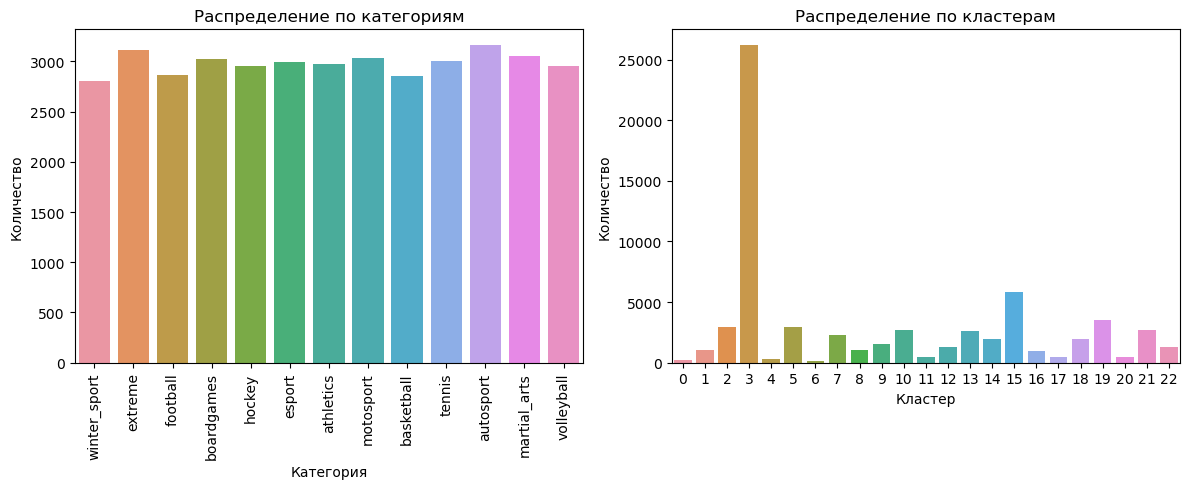

In [190]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='category', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_title('Распределение по категориям')
axs[0].set_xlabel('Категория')
axs[0].set_ylabel('Количество')


sns.countplot(data=df, x='cluster', ax=axs[1])
axs[1].set_title('Распределение по кластерам')
axs[1].set_xlabel('Кластер')
axs[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

## Матрица соответствия (confusion matrix)

### Заменим в датафрейме категории на номера, чтобы можно бло сравнить.

In [191]:
categories = set(df['category'])
numbers = list(range(len(categories)))
cattonum = dict(zip(categories, numbers))
cattonum

{'esport': 0,
 'athletics': 1,
 'motosport': 2,
 'basketball': 3,
 nan: 4,
 'hockey': 5,
 'winter_sport': 6,
 'autosport': 7,
 'tennis': 8,
 'volleyball': 9,
 'football': 10,
 'boardgames': 11,
 'extreme': 12,
 'martial_arts': 13}

In [192]:
df['category'] = df['category'].replace(cattonum)

In [193]:
df_filtered = df[df['category'] != 4].copy() # выкинем статьи без категории
df_filtered['category'] = df_filtered['category'].astype('category').cat.codes

In [194]:
df_filtered.head()

,oid,text,category,clean_text,cluster
26260,365271984,Волшебные фото Виктория Поплавская ЕвгенияМедв...,5,волшебный фото виктория поплавский евгениямедв...,3
26261,503385563,Возвращение в подземелье Треша 33 Эйфория тупо...,11,возвращение подземелье треш эйфория тупость жа...,15
26262,146016084,Лучшие чешские вратари – Доминик Доминатор Гаш...,9,хороший чешский вратарь доминик доминатор гаше...,3
26263,933865449,Rtokenoid Warhammer40k валрак решил нас подкор...,10,rtokenoid валрак решить подкормить сильно свеж...,9
26264,713550145,Шестеркин затаскивает Рейнджерс в финал Восточ...,4,шестёркин затаскивать рейнджерс финал восточны...,10


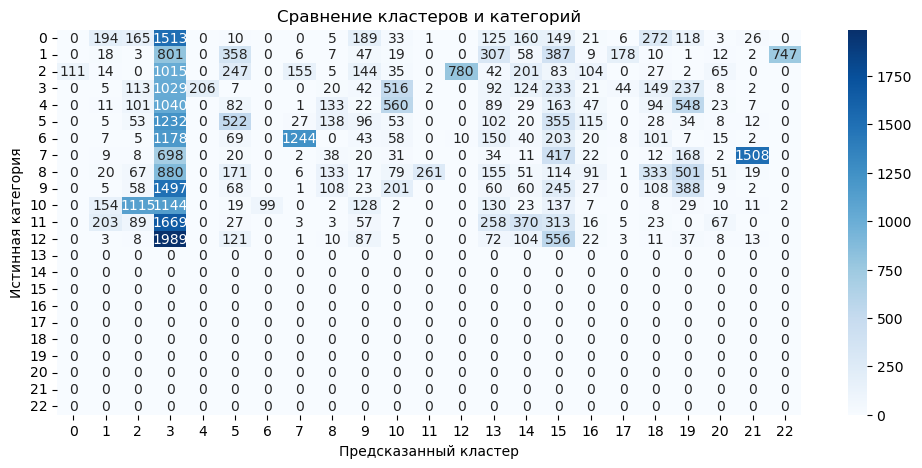

In [195]:
cm = confusion_matrix(df_filtered['category'], df_filtered['cluster'])
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный кластер')
plt.ylabel('Истинная категория')
plt.title('Сравнение кластеров и категорий')
plt.show()

<pre>Большинство категорий вроде выделилось.<br>
<b>Категория Кластер Кол-во совпадений</b>
0         2       1512
1         3       801
2         4       1015          
3         5       1025
4         
5
6         7       1178
7
8         10      1487
9         14      1666
10 
11        20      1508
12        22      1986
13</pre>

# Разделение данных

In [200]:
X = df['text']
y = df['category']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print(f"Train: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Test: {len(X_test)}")

Train: 39000
Validation: 13000
Test: 13000
